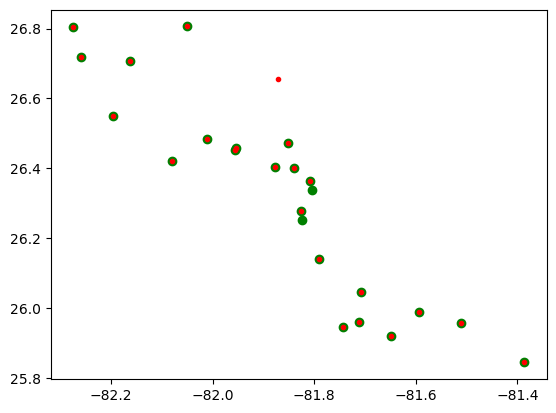

In [5]:
# map HWM
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cf
import geopandas as gpd
import numpy as np
import matplotlib.cm as cm

data_dir = 'F:/crs/proj/2025_NOPP_comparison/BAMS_figure/USGS/' 
fn = 'FilteredPeaks_edited.csv'
df_peaks = pd.read_csv( data_dir+fn )
fn = 'FilteredInstruments_edited.csv'
df_inst = pd.read_csv( data_dir+fn )
plt.plot(df_inst['longitude'],df_inst['latitude'],'og')
plt.plot(df_peaks['longitude_dd'],df_peaks['latitude_dd'],'.r')

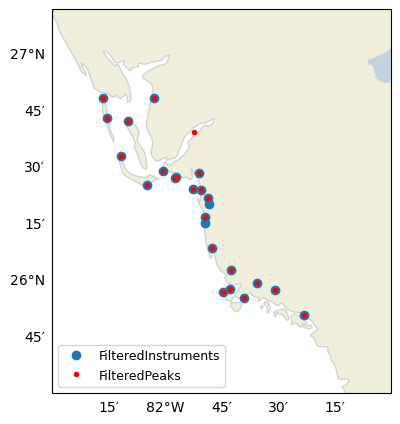

In [14]:
cpc = crs.PlateCarree()

fig1 = plt.figure()
ax1 = fig1.add_axes((0.12, 0.125, 0.8, 0.8),projection=cpc)
ax1.set_extent([-82.5, -81, 25.5, 27.2])
ax1.add_feature(cf.LAND, edgecolor='lightgray', linewidth=1, zorder=-1)
#ax1.add_feature(cf.COASTLINE)
ax1.add_feature(cf.LAKES, alpha=0.5)

## That sets up the plot.  To plot something, I'll just open the shapefile with the nhc best track
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# ax1.plot(hurpth[:,0],hurpth[:,1],'o-', markersize=6, linewidth=1, c='gray', zorder=5, label='Helene track')
# offset = 0.1
# for xy in range(len(hhmm)):
#     ax1.annotate(hhmm[xy], (hurpth[xy, 0]+offset, hurpth[xy, 1]), size=9, annotation_clip=True)

ax1.plot(df_inst['longitude'],df_inst['latitude'],'o', c='tab:blue', label='FilteredInstruments')
ax1.plot(df_peaks['longitude_dd'],df_peaks['latitude_dd'],'.r', label='FilteredPeaks')
# ax1.plot(noaa_df['longitude'],noaa_df['latitude'],'.',color=noaa_blue, label='NOAA Water Level')
# ax1.plot(rdg_df['longitude'],rdg_df['latitude'],'.',c=usgs_green,label='Rapid Depl. Gauge')
# ax1.plot(st_df['longitude'],st_df['latitude'],'.',c='darkviolet',label='Storm Tide Sensor')
# ax1.plot(ndbc_df['longitude'],ndbc_df['latitude'],'.',c='gold',label='NDBC Buoy')


gl.top_labels = False  # Turn off labels on the top
gl.right_labels = False  # Turn off labels on the right
gl.xlines = False  # Hide longitude gridlines
gl.ylines = False  # Hide latitude gridlines
ax1.legend(loc='lower left',fontsize=9)

# # Add a North arrow
# ax1.text(0.05, 0.9, 'N', transform=ax1.transAxes, ha='center', va='center', fontsize=16,
#         fontweight='bold', color='black')
# ax1.annotate('', xy=(0.05, 0.85), xytext=(0.05, 0.75), xycoords='axes fraction',
#             arrowprops=dict(facecolor='black', width=4, headwidth=10))


plt.savefig(data_dir+'observations_map_ian.png', dpi=200, bbox_inches='tight')